# 1. Simulate a function
* Train at least two different DNN models wiht the same ammount foparameters until convergece

The first function I try to simulate is:
>f(x) = x<sup>3</sup>


I use 20000*2 = 40,000 points (from -2 to 2) to simulate the function


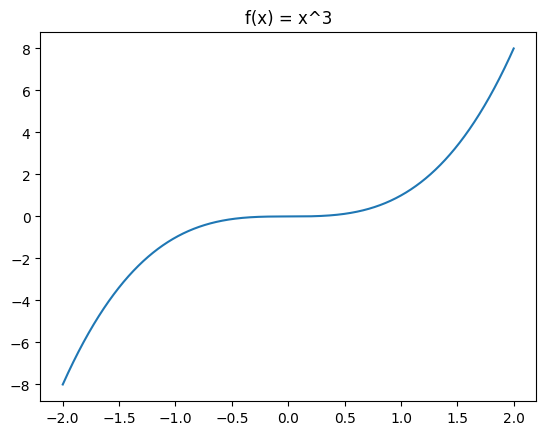

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([*range(-20000,20000)],dtype=np.float32)
X = X*0.0001
y1 = [x**3for x in X]

plt.plot(X, y1)
plt.title("f(x) = x^3")
plt.show()


## Preparing data

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Convert numpy array to tensors
X_t = torch.tensor(X,dtype=torch.float32)
y1_t = torch.tensor(y1,dtype=torch.float32)

# Make tensors the correct shape
X_t = X_t.view(X_t.shape[0],1)
y1_t = y1_t.view(y1_t.shape[0],1)

# If GPU is available use it; otherwise use CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device", device)

X_t = X_t.to(device)
y1_t = y1_t.to(device)


device cuda


## Model 1
For the first model I implement a Neural Network with
  * An input layer
  * One hidden layer of dimension (1, 128)
  * An output layer with dimension (128, 1)

* After each layer a ReLU activation function is applied.


This model uses a mean squared error (L2 norm) function to calculate the loss.\
To perfrom update our parameters the model uses stochastic gradient descent (SGD).


I decided to set a learning rate of 0.01 during 3000 epochs.


In [3]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1,self).__init__()
        self.l1 = nn.Linear(1,128)
        self.l2 = nn.Linear(128,1)
        #self.l2 = nn.Linear(1024,1024)
        #self.l3 = nn.Linear(1024,1)

    def forward(self,x):
        out = F.relu(self.l1(x))
        out = self.l2(out)
        return out

# Hyperparameters
learning_rate = 0.01
num_epochs = 3000

model1_f1 = Model1()
# Make model use available device (CPU or GPU)
model1_f1 = model1_f1.to(device)

loss  = nn.MSELoss()
gradient = torch.optim.SGD(model1_f1.parameters(),lr=learning_rate)

train_loss_list_m1_f1 = []
epochs_list1 = []

# Train model1 with function 1: f(x) = x^3
for epoch in range(num_epochs):
    model1_f1.train()
    y_pred = model1_f1.forward(X_t)
    l = loss(y_pred,y1_t)
    l.backward()
    gradient.step()
    gradient.zero_grad()
    train_loss_list_m1_f1.append(l.item())
    epochs_list1.append(epoch)
    if(epoch+1)%500==0:
        print(f'epoch:{epoch+1},loss={l.item():.3f}')


epoch:500,loss=0.131
epoch:1000,loss=0.061
epoch:1500,loss=0.034
epoch:2000,loss=0.022
epoch:2500,loss=0.015
epoch:3000,loss=0.011


# Model 2
For the second model I define a Neural Network that uses a sequential model with:
>
* An input layer
* One hidden layer of dimension (1, 1024)
* One output layer with dimension (1024, 1)

This model uses the Adam instead of Stochastic Gradient Desent for the optimization algorithm.

Just like with the first model we use Mean Square Error to calculate the errors.

This model uses a learning rate of 0.001 and runs for 3000 epochs

In [4]:
class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.regressor = nn.Sequential(nn.Linear(1, 1024),
                                   #nn.ReLU(inplace=True),
                                   #nn.Linear(1024, 1024),
                                   #nn.ReLU(inplace=True),
                                   #nn.Linear(1024, 1024),
                                   nn.ReLU(inplace=True),
                                   nn.Linear(1024, 1))
  def forward(self, x):
    output = self.regressor(x)
    return output

# Hyperparameters
learning_rate = 0.001
num_epochs = 3000

# Make model use available device (CPU or GPU)
model2_f1 = Model2()
model2_f1 = model2_f1.to(device)

optimizer = torch.optim.Adam(model2_f1.parameters())
criterion = nn.MSELoss(reduction="mean")

train_loss_list_m2_f1 = []
epochs_list2 = []

# Train model2 with function 1: f(x) = 5x^3+2x^2-3x-2
for epoch in range(num_epochs):
  model2_f1.train()
  y_pred = model2_f1.forward(X_t)
  l = loss(y_pred, y1_t)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_loss_list_m2_f1.append(l.item())
  epochs_list2.append(epoch)
  if (epoch+1)%500==0:
    print(f"epoch:{epoch+1}, loss={l.item():3f}")


epoch:500, loss=0.007907
epoch:1000, loss=0.001301
epoch:1500, loss=0.000409
epoch:2000, loss=0.000170
epoch:2500, loss=0.000082
epoch:3000, loss=0.000043


# Model 3
For the second model we define a Neural Network that uses:
>
* An input layer (of one element)
* One hidden layer with dimension (1, 28)
* One output layer with dimension (28, 1)

In [5]:
class Model3(nn.Module):
  def __init__(self):
    super(Model3, self).__init__()
    self.linear1 = nn.Linear(1, 28) # 28*28 = 728
    #self.linear2 = nn.Sigmoid(28, 28)
    self.activation = nn.Softmax(dim=1)
    #self.activation = nn.Sigmoid()
    self.linear2 = nn.Linear(28, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    #x = self.linear3(x)
    return x

model3_f1 = Model3()
model3_f1 = model3_f1.to(device)

# Hyperparameters

# Training loop
num_epochs = 3000

#BATCH_SIZE = 32
#BATCH_SIZE = 128
LEARNING_RATE = 0.001

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model3_f1.parameters(), lr=LEARNING_RATE) #Adam
#optimizer = torch.optim.SGD(model3_f1.parameters(), lr=LEARNING_RATE) #SGD

train_loss_list_m3_f1 = []
#train_loss_list_m2_f2 = []
epochs_list3 = []

# Train model2 with function 1: f(x) = 5x^3+2x^2-3x-2
for epoch in range(num_epochs):
  model3_f1.train()
  y_pred = model3_f1.forward(X_t)
  l = loss(y_pred, y1_t)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_loss_list_m3_f1.append(l.item())
  epochs_list2.append(epoch)
  if (epoch+1)%500==0:
    print(f"epoch:{epoch+1}, loss={l.item():3f}")

epoch:500, loss=7.059244
epoch:1000, loss=5.090322
epoch:1500, loss=3.537775
epoch:2000, loss=2.557603
epoch:2500, loss=1.821393
epoch:3000, loss=1.307355


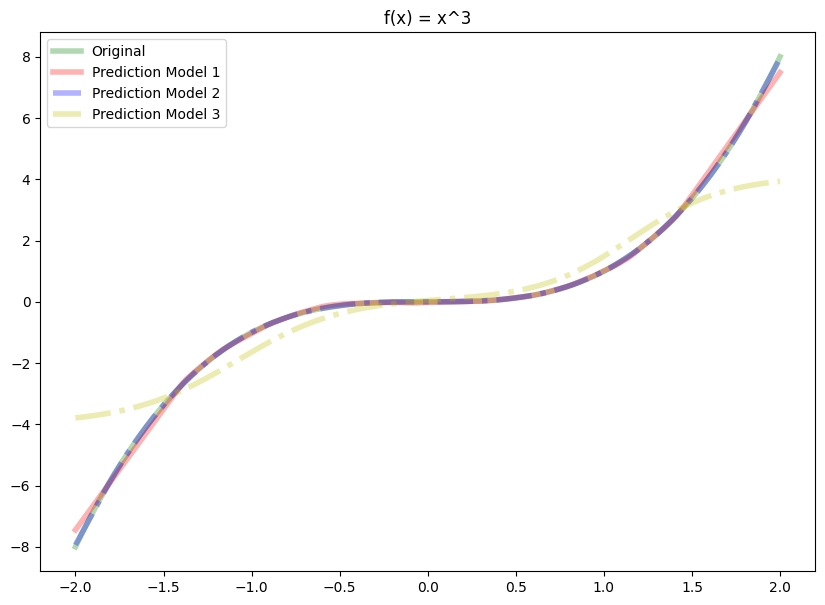

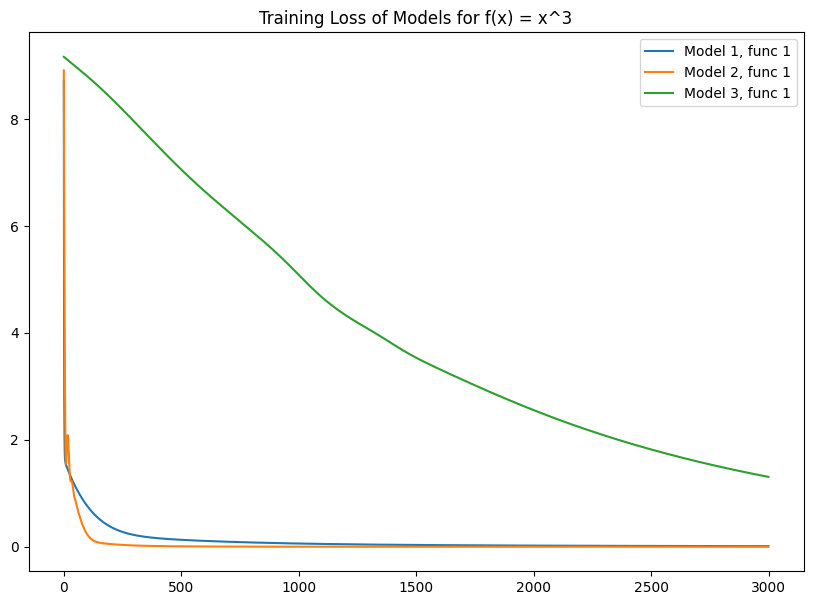

In [6]:
## Plot function predictions
predicted_m1_f1 = model1_f1(X_t).detach().cpu().numpy()
predicted_m2_f1 = model2_f1(X_t).detach().cpu().numpy()
predicted_m3_f1 = model3_f1(X_t).detach().cpu().numpy()

original_y1 = y1_t.cpu().numpy()
X_cpu = X_t.cpu().numpy()

plt.figure(figsize=(10,7))


plt.plot(X_cpu, original_y1, linewidth=4 ,alpha = 0.3, c="g",label = "Original")
plt.plot(X_cpu, predicted_m1_f1, linewidth=4, c="r", alpha = 0.3, label="Prediction Model 1")
plt.plot(X_cpu, predicted_m2_f1, "-.", linewidth=4, c="b", alpha = 0.3, label="Prediction Model 2")
plt.plot(X_cpu, predicted_m3_f1, "-.", linewidth=4, c="y", alpha = 0.3, label="Prediction Model 3")
plt.title("f(x) = x^3")
plt.legend()
plt.show()

## Plot loss
plt.figure(figsize=(10,7))
plt.plot(epochs_list1, train_loss_list_m1_f1, label="Model 1, func 1")
plt.plot(epochs_list1, train_loss_list_m2_f1, label="Model 2, func 1")
plt.plot(epochs_list1, train_loss_list_m3_f1, label="Model 3, func 1")
plt.legend()
plt.title("Training Loss of Models for f(x) = x^3")
plt.show()

We can see that the 3 models use the same ammount of parameters:

In [7]:
print("model1 #params: ", len(list(model1_f1.parameters())))
print("model2 #params: ", len(list(model2_f1.parameters())))
print("model3 #params: ", len(list(model3_f1.parameters())))

model1 #params:  4
model2 #params:  4
model3 #params:  4


# Function 2
The second function we try to simulate is:
>f(x) =sin(5πx)


We use 20000*2 = 40,000 points (from -2 to 2) to simulate the function

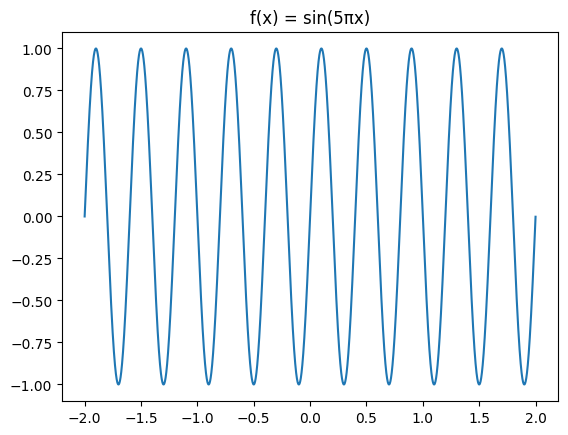

In [8]:
X = np.array([*range(-20000,20000)],dtype=np.float32)
X = X*0.0001 

y2 = [(np.sin(5 * np.pi * x))for x in X]
plt.plot(X, y2)
plt.title("f(x) = sin(5πx)")
plt.show()

## Prepare Data

In [9]:
# Convert numpy array to tensors
X_t = torch.tensor(X,dtype=torch.float32)
y2_t = torch.tensor(y2,dtype=torch.float32)

# Make tensors the correct shape
X_t = X_t.view(X_t.shape[0],1)
y2_t = y2_t.view(y2_t.shape[0],1)

# If GPU is available use it; otherwise use CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("device", device)

X_t = X_t.to(device)
y2_t = y2_t.to(device)

device cuda


We use the same 3 models:
## Model 1

In [10]:
#MODEL1
model1_f2 = Model1()
# Make model use available device (CPU or GPU)
model1_f2 = model1_f1.to(device)

# Hyperparameters
learning_rate = 0.001
1
num_epochs = 3000

train_loss_list_m1_f2 = []
epochs_list1 = []

loss  = nn.MSELoss()
gradient = torch.optim.SGD(model1_f2.parameters(),lr=learning_rate)

# Train model1 with function 2: f(x) = sin(5πx)
for epoch in range(num_epochs):
    model1_f2.train()
    y_pred = model1_f2.forward(X_t)
    l = loss(y_pred,y2_t)
    l.backward()
    gradient.step()
    gradient.zero_grad()
    train_loss_list_m1_f2.append(l.item())
    epochs_list1.append(epoch)
    if(epoch+1)%500==0:
        print(f'epoch:{epoch+1},loss={l.item():.3f}')

epoch:500,loss=0.957
epoch:1000,loss=0.736
epoch:1500,loss=0.652
epoch:2000,loss=0.599
epoch:2500,loss=0.568
epoch:3000,loss=0.551


In [11]:
#MODEL2

# Make model use available device (CPU or GPU)
model2_f2 = Model2()
model2_f2 = model2_f1.to(device)

# Hyperparameters
learning_rate = 0.001
num_epochs = 3000

optimizer = torch.optim.Adam(model2_f2.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model1_f1.parameters(),lr=learning_rate)
criterion = nn.MSELoss(reduction="mean")

train_loss_list_m2_f2 = []
#epochs_list2 = []

# Train model2 with function 2: f(x) = sin(5πx)
for epoch in range(num_epochs):
  model2_f2.train()
  y_pred = model2_f2.forward(X_t)
  l = loss(y_pred, y2_t)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_loss_list_m2_f2.append(l.item())
  #epochs_list2.append(epoch)
  if (epoch+1)%500==0:
    print(f"epoch:{epoch+1}, loss={l.item():3f}")


epoch:500, loss=0.486967
epoch:1000, loss=0.469988
epoch:1500, loss=0.456476
epoch:2000, loss=0.440821
epoch:2500, loss=0.420485
epoch:3000, loss=0.392739


In [12]:
#MODEL3

model3_f2 = Model3()
model3_f2 = model3_f2.to(device)

# Training loop
num_epochs = 3000

#BATCH_SIZE = 32
#BATCH_SIZE = 128
LEARNING_RATE = 0.0001

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model3_f2.parameters(), lr=LEARNING_RATE) #Adam
#optimizer = torch.optim.SGD(model3_f2.parameters(), lr=LEARNING_RATE) #SGD

train_loss_list_m3_f2 = []
epochs_list3 = []

# Train model2 with function 1: f(x) = sin(5πx)
for epoch in range(num_epochs):
  model3_f1.train()
  y_pred = model3_f2.forward(X_t)
  l = loss(y_pred, y2_t)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_loss_list_m3_f2.append(l.item())
  epochs_list2.append(epoch)
  if (epoch+1)%500==0:
    print(f"epoch:{epoch+1}, loss={l.item():3f}")

epoch:500, loss=0.504703
epoch:1000, loss=0.499046
epoch:1500, loss=0.497870
epoch:2000, loss=0.497413
epoch:2500, loss=0.497168
epoch:3000, loss=0.497040


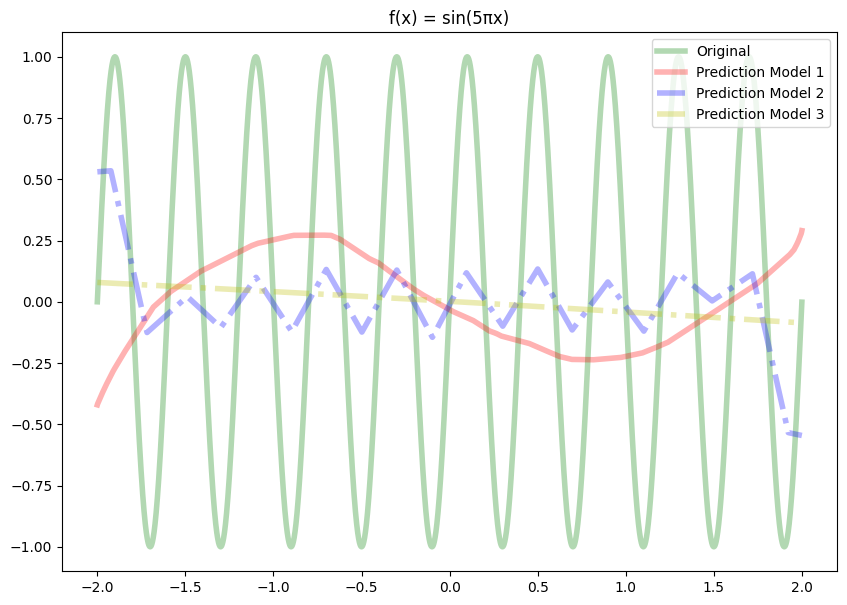

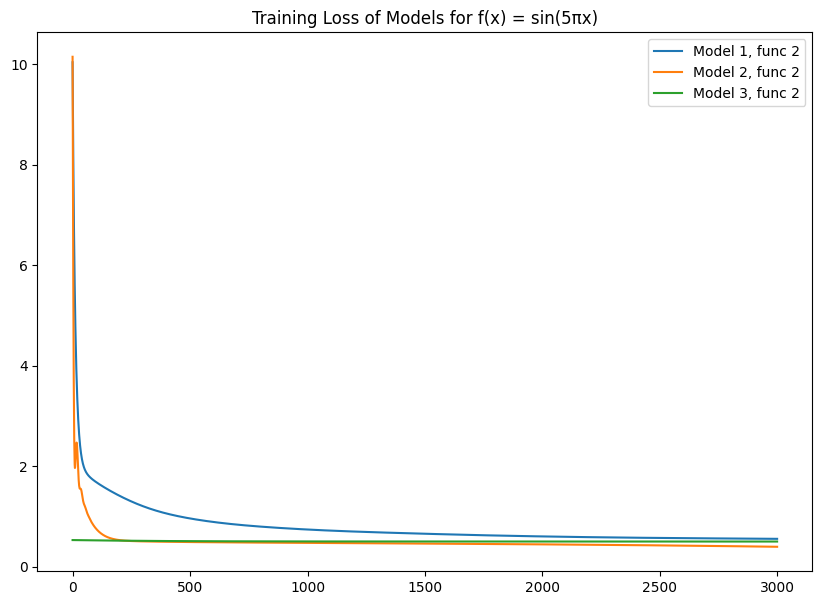

In [13]:
## Plot function predictions
predicted_m1_f2 = model1_f2(X_t).detach().cpu().numpy()
predicted_m2_f2 = model2_f2(X_t).detach().cpu().numpy()
predicted_m3_f2 = model3_f2(X_t).detach().cpu().numpy()

original_y2 = y2_t.cpu().numpy()
X_cpu = X_t.cpu().numpy()

plt.figure(figsize=(10,7))


plt.plot(X_cpu, original_y2, linewidth=4 ,alpha = 0.3, c="g",label = "Original")
plt.plot(X_cpu, predicted_m1_f2, linewidth=4, c="r", alpha = 0.3, label="Prediction Model 1")
plt.plot(X_cpu, predicted_m2_f2, "-.", linewidth=4, c="b", alpha = 0.3, label="Prediction Model 2")
plt.plot(X_cpu, predicted_m3_f2, "-.", linewidth=4, c="y", alpha = 0.3, label="Prediction Model 3")
plt.title("f(x) = sin(5πx)")
plt.legend()
plt.show()

## Plot loss
plt.figure(figsize=(10,7))
plt.plot(epochs_list1, train_loss_list_m1_f2, label="Model 1, func 2")
plt.plot(epochs_list1, train_loss_list_m2_f2, label="Model 2, func 2")
plt.plot(epochs_list1, train_loss_list_m3_f2, label="Model 3, func 2")
plt.legend()
plt.title("Training Loss of Models for f(x) = sin(5πx)")
plt.show()

In [14]:
print("model1 #params: ", len(list(model1_f2.parameters())))
print("model2 #params: ", len(list(model2_f2.parameters())))
print("model3 #params: ", len(list(model3_f2.parameters())))

model1 #params:  4
model2 #params:  4
model3 #params:  4
